In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('sales_afinal.csv')

In [3]:
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Creating a data structure with 8 timesteps and 1 output. Considering the next output will depend on at least 8 previous outputs.
X_train = []
y_train = []


for i in range(8, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-8:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
y_train

array([0.35025381, 0.47715736, 0.51269036, 0.60913706, 0.55837563,
       0.52791878, 0.59390863, 0.58883249, 0.52284264, 0.77664975,
       0.73096447, 0.64467005, 0.58375635, 0.56852792, 1.        ,
       0.52791878, 0.48730964, 0.44162437, 0.60913706, 0.59898477,
       0.88324873, 0.4822335 , 0.45685279, 0.39086294, 0.37563452,
       0.34517766, 0.47208122, 0.62944162, 0.36040609, 0.5177665 ,
       0.49746193, 0.62944162, 0.70558376, 0.75126904, 0.0964467 ,
       0.1319797 , 0.11675127, 0.17258883, 0.11675127, 0.11167513,
       0.03553299, 0.07614213, 0.05076142, 0.06598985, 0.04568528,
       0.04060914, 0.        , 0.11167513, 0.05076142, 0.05583756,
       0.00507614, 0.06091371, 0.10659898, 0.14720812])

In [9]:
# Part 2 - Building the RNN

In [10]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

Using TensorFlow backend.


In [11]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


In [12]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [14]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [15]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 8, 50)             10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 8, 50)             20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [17]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 40, batch_size = 10)

Epoch 1/40
54/54 [==============================] - 8s 149ms/step - loss: 0.1674
Epoch 2/40
54/54 [==============================] - 0s 8ms/step - loss: 0.0684
Epoch 3/40
54/54 [==============================] - 1s 10ms/step - loss: 0.0496
Epoch 4/40
54/54 [==============================] - 0s 9ms/step - loss: 0.0434
Epoch 5/40
54/54 [==============================] - 0s 8ms/step - loss: 0.0407
Epoch 6/40
54/54 [==============================] - 0s 9ms/step - loss: 0.0407
Epoch 7/40
54/54 [==============================] - 0s 8ms/step - loss: 0.0449
Epoch 8/40
54/54 [==============================] - 0s 8ms/step - loss: 0.0466
Epoch 9/40
54/54 [==============================] - 0s 9ms/step - loss: 0.0451
Epoch 10/40
54/54 [==============================] - 0s 8ms/step - loss: 0.0373
Epoch 11/40
54/54 [==============================] - 0s 8ms/step - loss: 0.0365
Epoch 12/40
54/54 [==============================] - 0s 8ms/step - loss: 0.0382
Epoch 13/40
54/54 [===========================

In [18]:
# Part 3 - Making the predictions and visualising the results

# Getting the real sale price of 2019
dataset_test = pd.read_csv('sales_atest.csv')
real_sale_price = dataset_test.iloc[:, 1:2].values

In [19]:
real_sale_price

array([[58],
       [59],
       [63],
       [49],
       [52],
       [48],
       [51],
       [39],
       [40],
       [41],
       [48],
       [46],
       [51],
       [53],
       [58],
       [50]], dtype=int64)

In [20]:
# Getting the predicted sale price of 2020
dataset_total = pd.concat((dataset_train['sales'], dataset_test['sales']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 8:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [21]:
len(inputs)

24

In [22]:
dataset_total

0     151
1     127
2     113
3     105
4     113
     ... 
11     46
12     51
13     53
14     58
15     50
Name: sales, Length: 78, dtype: int64

In [23]:
X_test = []
for i in range(8, 25):
    X_test.append(inputs[i-8:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_sale = regressor.predict(X_test)
predicted_sale = sc.inverse_transform(predicted_sale)

In [24]:
predicted_sale

array([[46.366085],
       [48.98924 ],
       [50.10276 ],
       [52.928024],
       [55.35839 ],
       [58.09415 ],
       [58.92496 ],
       [58.421947],
       [56.596848],
       [54.53921 ],
       [52.177586],
       [49.74958 ],
       [48.974525],
       [48.362606],
       [48.662903],
       [49.32663 ],
       [51.292225]], dtype=float32)

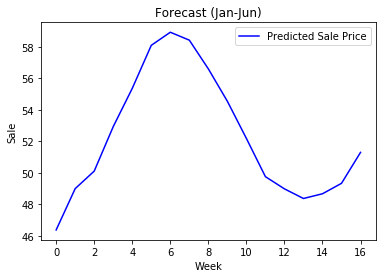

In [25]:
# Visualising the results
plt.plot(predicted_sale, color = 'blue', label = 'Predicted Sale Price')
plt.title('Forecast (Jan-Jun)')
plt.xlabel('Week')
plt.ylabel('Sale')
plt.legend()
plt.show()

**The End**